## ДОМАШНЕЕ ЗАДАНИЕ №2 Метод главных компонент



In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

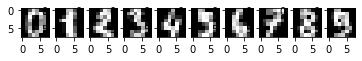

In [11]:
digits = load_digits()
fig, ax = plt.subplots(1,10)
for i in range(10):
    ax[i].imshow(digits.images[i], cmap = 'gray')
X = digits['data']
labels = digits['target']

In [12]:
class PCA():

    def __init__(self, n_components=None):
        self.n_components = n_components
    
    def fit(self, X):
        X1 = X
        m = np.mean(X1, axis = 0)
        X1 -= m
        C = X1.T.dot(X1)
        l, F = np.linalg.eigh(C)
        l = l[::-1]
        F = F[:, ::-1]
        # _, S, Vh = np.linalg.svd(C, full_matrices = False)
        # F1, l1 = Vh.T, S
        return X1, F, l
        
    def transform(self, X, F):
        Y = X.dot(F)
        return Y

    def fit_transform(self, X):
        X_c, F, _ = self.fit(X)
        Y = self.transform(X_c, F)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y
    
test = PCA(2)

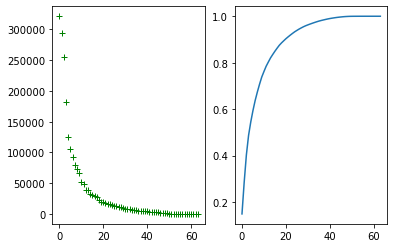

In [13]:
_, _, l = test.fit(X)
plt.subplot(1,2,1)
plt.plot(l, marker = '+', linestyle = '', color='green')
plt.subplot(1,2,2)
plt.plot(np.cumsum(l) / np.sum(l))

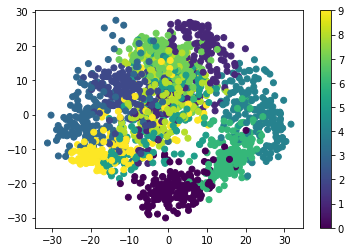

In [14]:
Y = test.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c = labels, cmap='viridis')
plt.colorbar()


## III. Алгоритм kNN в виде класса

Метод init() необходим для сохранения количества соседей, по умолчанию их 5.

Метод fit() - сохрянение обучающих данных.

Метод predict() - вычисление возможного класса тестируемого объекта. Для данных вычислений необходимо знать расстояние от исследуемой точки до точек в обучающей базе.

In [15]:
class kNN():
    
    def __init__(self, n_neighbours = 5):
        self.n_neighbours = n_neighbours
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        predict_class = list()
        for item in X: 
            point_dist = list() 
            for j in range(len(self.X_train)): #считаем расстояние от точки до каждого элемента
                dist = np.sqrt(np.sum((np.array(self.X_train[j]) - np.array(item)) ** 2)) 
                point_dist.append(dist)
            point_dist = np.array(point_dist)
            #вычисляем индексы первых k минимальных расстояний
            min_dist_arg = np.argsort(point_dist)[:self.n_neighbours] 
            min_dist_labels = list()
            for i in min_dist_arg: #находим соответсвующие лэйблы к этим соседям
                min_dist_labels.append(self.y_train[i]) #вычисляем уникальные метки и их число
            values, counts = np.unique(min_dist_labels, return_counts = True) #ищем метку с максимальных числом вхождений
            possible_label = values[np.argmax(counts)]
            predict_class.append(possible_label)
        return predict_class

Посмотрим на точность выборке соседей через построенный график



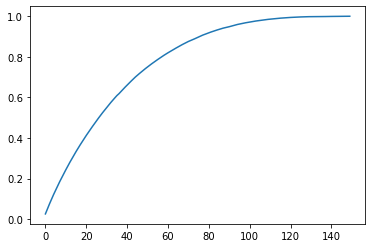

In [16]:
A = np.random.randn(150,150)
l, _ = np.linalg.eig(A.dot(A.T))
plt.plot(np.cumsum(l) / np.sum(l))

## АНАЛИЗ ЛАБОРАТОРНОЙ РАБОТЫ №6:

Ознакомление с принципом главных компонент. Реализация метода главных компонент, который позволяет выделить наиболее значимую информацию из данных с использованием линейных преобразований. Также с помощью этого метода и алгоритма k-ближайших соседей была решена задача распознавания рукописных цифр.

